In [1]:
#importing the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

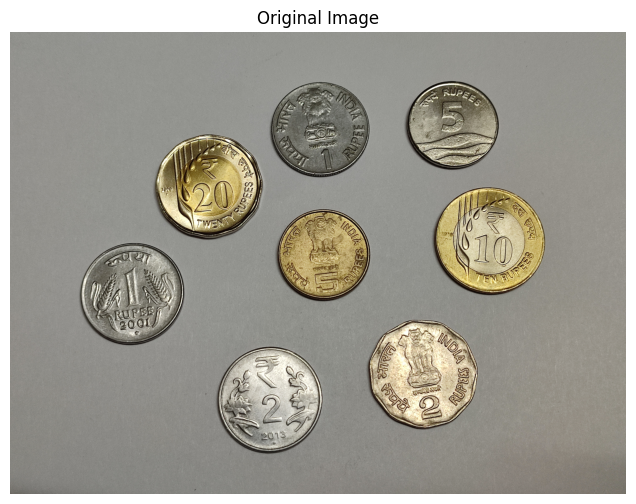

In [2]:
#load the image
image_path = "coins.jpg" 
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #Convert the image from BGR to RGB for proper visualization in Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()

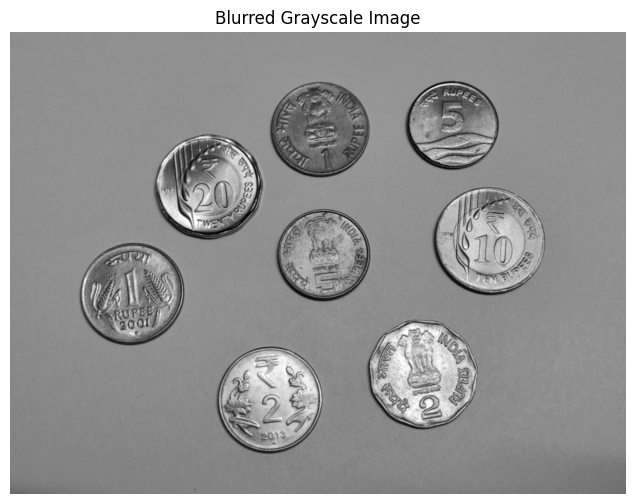

In [3]:
#Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Apply Gaussian Blur to smooth the image and reduce noise
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
plt.figure(figsize=(8, 6))
plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.title("Blurred Grayscale Image")
plt.show()

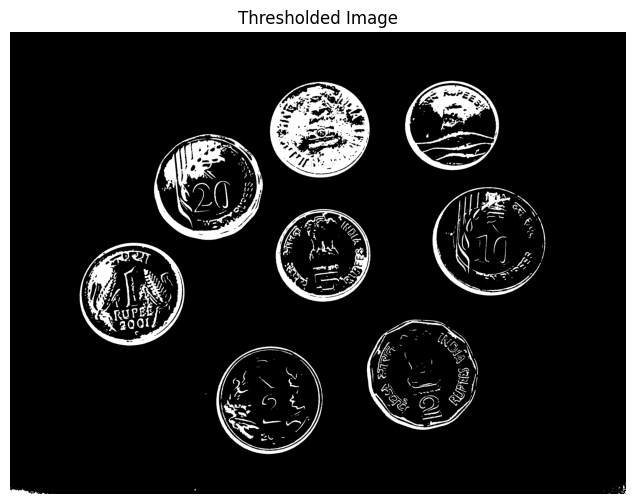

In [4]:
#Apply Otsu's Thresholding to create a binary mask
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure(figsize=(8, 6))
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.title("Thresholded Image")
plt.show()

In [5]:
# Find contours of the detected objects (coins)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Filter out small contours based on area threshold to remove noise
min_area = 5000
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

In [6]:
#Remove nested contours (inner coin details) to ensure only full coins are counted
final_contours = []
for i, cnt in enumerate(filtered_contours):
    keep = True
    x, y, w, h = cv2.boundingRect(cnt)
    
    for j, other_cnt in enumerate(filtered_contours):
        if i != j:
            x2, y2, w2, h2 = cv2.boundingRect(other_cnt)
            # If the contour is completely inside another, discard it
            if x > x2 and y > y2 and x + w < x2 + w2 and y + h < y2 + h2:
                keep = False
                break

    if keep:
        final_contours.append(cnt)

In [7]:
# Count the total number of detected coins
total_coins = len(final_contours)
print(f"Total number of coins detected: {total_coins}")

Total number of coins detected: 8


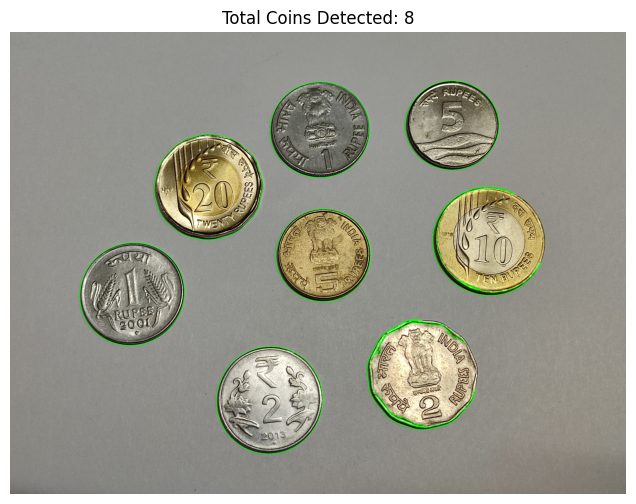

In [8]:
# Draw contours around detected coins on the original image
result_image = image.copy()
cv2.drawContours(result_image, final_contours, -1, (0, 255, 0), 3)

result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB) #Convert the result image from BGR to RGB for display

plt.figure(figsize=(8, 6))
plt.imshow(result_image_rgb)
plt.axis("off")
plt.title(f"Total Coins Detected: {total_coins}")
plt.show()